In [1]:
import torch
print(torch.__version__)

2.5.0+cu121


In [2]:
!pip install torch==2.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import torch
print(torch.__version__)

2.2.1+cu121


In [2]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.4/943.4 kB 42.9 MB/s eta 0:00:00


In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00


In [4]:
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.nn.functional import dropout
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv, Linear, SAGEConv

In [29]:
class GCN(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.conv1 = GCNConv(-1, 64)  # SAGEConv((-1, -1), 64)
        self.conv2 = GCNConv(-1, 128)  # SAGEConv((-1, -1), 128)

        self.linear1 = Linear(128, 64)
        self.linear2 = Linear(64, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).tanh()
        x = dropout(x, p=0.3)

        x = self.conv2(x, edge_index).tanh()
        x = dropout(x, p=0.3)

        x = self.linear1(x)
        x = self.linear2(x)

        return x

In [6]:
def train(model, dataset, optimizer, criterion, epochs=5):
    if len(dataset.train_mask.shape) > 1:
        train_mask = dataset.train_mask[:, 0]
    else:
        train_mask = dataset.train_mask

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(dataset.x, dataset.edge_index)
        loss = criterion(out[train_mask],
                         dataset.y[train_mask])
        loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

In [7]:
data = Planetoid('data', 'Cora')

Processing...
Done!


In [9]:
dataset = data[0]

In [10]:
dataset

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [11]:
model_gcn = GCN(7)

In [12]:
model_gcn

GCN(
  (conv1): GCNConv(-1, 64)
  (conv2): GCNConv(-1, 128)
  (linear1): Linear(128, 7, bias=True)
)

In [13]:
criterion = CrossEntropyLoss()

In [16]:
optimizer = Adam(model_gcn.parameters(), lr=0.001)

In [18]:
train(model=model_gcn, dataset=dataset,
      criterion=criterion, optimizer=optimizer,
      epochs=50)

Epoch: 000, Loss: 1.8422
Epoch: 001, Loss: 1.8229
Epoch: 002, Loss: 1.7971
Epoch: 003, Loss: 1.7669
Epoch: 004, Loss: 1.7381
Epoch: 005, Loss: 1.7105
Epoch: 006, Loss: 1.6800
Epoch: 007, Loss: 1.6429
Epoch: 008, Loss: 1.6080
Epoch: 009, Loss: 1.5707
Epoch: 010, Loss: 1.5267
Epoch: 011, Loss: 1.4968
Epoch: 012, Loss: 1.4470
Epoch: 013, Loss: 1.4022
Epoch: 014, Loss: 1.3603
Epoch: 015, Loss: 1.2975
Epoch: 016, Loss: 1.2702
Epoch: 017, Loss: 1.2116
Epoch: 018, Loss: 1.1725
Epoch: 019, Loss: 1.1161
Epoch: 020, Loss: 1.0701
Epoch: 021, Loss: 1.0027
Epoch: 022, Loss: 0.9547
Epoch: 023, Loss: 0.8992
Epoch: 024, Loss: 0.8717
Epoch: 025, Loss: 0.8065
Epoch: 026, Loss: 0.7742
Epoch: 027, Loss: 0.7248
Epoch: 028, Loss: 0.6738
Epoch: 029, Loss: 0.6234
Epoch: 030, Loss: 0.5895
Epoch: 031, Loss: 0.5396
Epoch: 032, Loss: 0.5086
Epoch: 033, Loss: 0.4762
Epoch: 034, Loss: 0.4366
Epoch: 035, Loss: 0.4041
Epoch: 036, Loss: 0.3882
Epoch: 037, Loss: 0.3547
Epoch: 038, Loss: 0.3377
Epoch: 039, Loss: 0.3074


In [22]:
gcn_embeddings = model_gcn(dataset.x, dataset.edge_index).detach().cpu().numpy()

In [24]:
labels = dataset.y.detach().cpu().numpy()

In [28]:
set(labels)

{0, 1, 2, 3, 4, 5, 6}

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [25]:
model_tsne = TSNE(n_components=2)

In [26]:
gcn_embeddings_2d = model_tsne.fit_transform(gcn_embeddings)

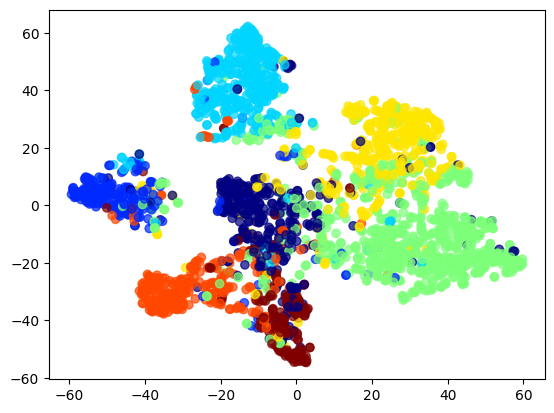

In [27]:
plt.scatter(gcn_embeddings_2d[:, 0], gcn_embeddings_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)